Plotting in Julia
=============

There are a number of popular plotting libraries for Julia, each with their own tradeoffs. Here we'll give a brief overview of one of the most popular - **Plots.jl** - as it is the easiest to pick up, and is very flexible.

We'd also recommend installing **LaTeXStrings.jl** as well, which provides a special L"" string format that parses LaTeX markup inside the string, as it makes titles etc. for plots much more professional.

As always, we need to load the library first:

In [1]:
using Plots, LaTeXStrings #if you didn't install it already, you would need to use Pkg to add Plots first

## Basic Plots

The plotting functions provided take arrays of points, so lets make a set of 100 points from 0 to 2π, and then evaluate sin and cos for them:

In [2]:
x = [i*π/50 for i = 0:100] 
y = sin.(x)
y2 = cos.(x);

The basic plot is then easy (and should be reminiscent of *matplotlib*). Note that the Arrays used to provide multiple series must be *column* vectors - Plots assumes points in a series are in the *row* direction.

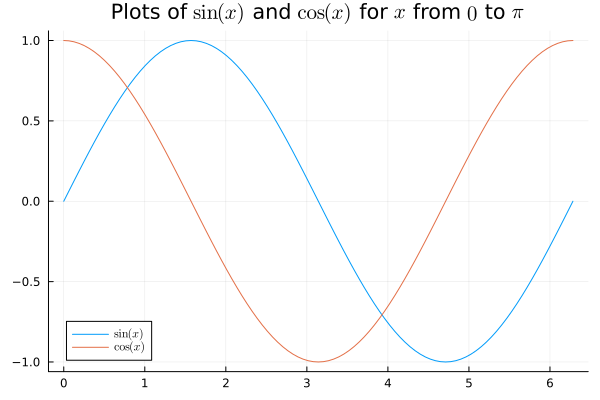

In [3]:
p = plot(x,[y y2], title=L"Plots of $\sin(x)$ and $\cos(x)$ for $x$ from $0$ to $\pi$", label=[L"\sin(x)" L"\cos(x)"]) 
#storing the plot reference in a var is optional if we only want to modify the current plot

We can easily modify a plot object to add new graphs. As always, Julia convention is that a function that *modifies* existing state has a `!` at the end - in this case, we're explicitly specifying the plot to alter as the first argument, but Julia's multiple dispatch allows us to also omit the plot (and thus alter the active - usually the most recent - plot implicitly).

We're also demonstrating Plots' support for interpolating functions - here we're passing the function `cos2` to plot, and it evaluates it at all the points it needs to plot the series.

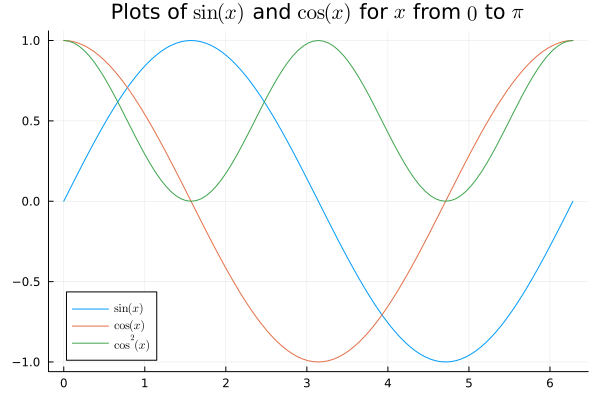

In [4]:
cos2(x) = cos(x)^2 
plot!(p, x, cos2, label=L"\cos^2(x)") 
#or plot!(x, y.^2, label=L"\cos^2(x)") since this is the "active" plot

### Plot Properties

Plot takes the usual options to specify properties of the plot, as you will have seen above.

Some of these have special functions to allow us to quickly modify only them in a plot (without needing a whole plot! function call): 

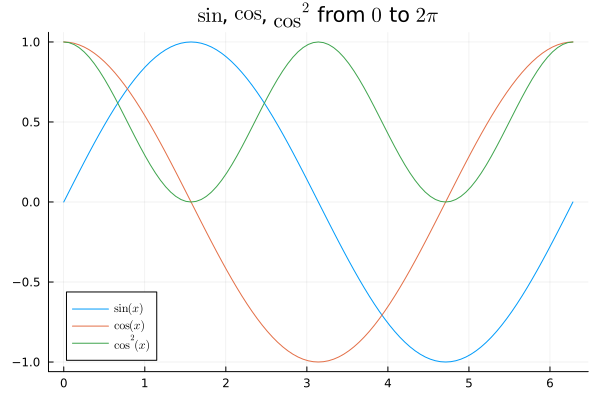

In [5]:
title!(L"$\sin$, $\cos$, $\cos^2$ from $0$ to $2\pi$")

We can select different plot types by setting the `seriestype` property for a given series, even when modifying an existing plot. 

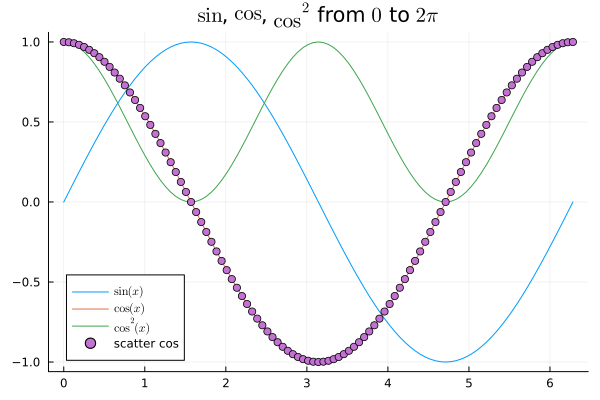

In [6]:
plot!(x, y2, seriestype=:scatter, label="scatter cos")

Or, equivalently, by using a function with the same name as the `seriestype` we want (`line` is the default plot type) - here we're also setting the colour and shape for the markers plotted.

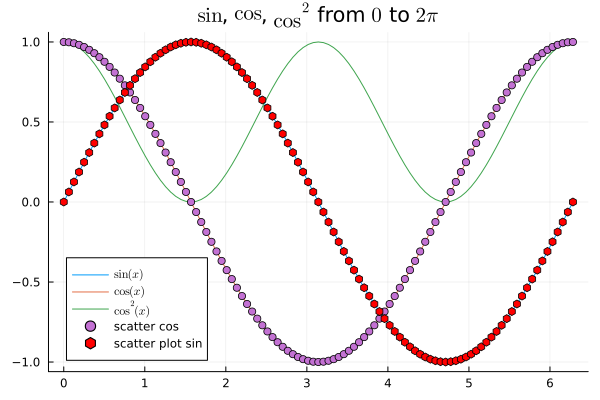

In [7]:
scatter!(x, y, label="scatter plot sin", markercolor=:red, markershape=:hexagon)

## Layout and Subfigures

Plots also supports more advanced options like layout for subfigures, and so on - here `layout` distributes the two series into separate subfigures - the tuple's geometry is (vertical , horizontal) subdivisions, but we could also just let it know the number of subplots we want, and let it pick a good arrangement by providing just a number.

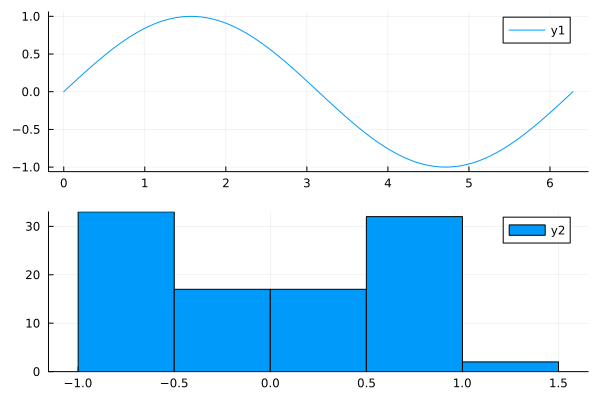

In [8]:
plot(x, [y y2], layout=(2,1), seriestype=[:line :histogram])

For more complex set-ups, the `@layout` macro can make a layout from a nested 2d Array, which it maps to the plots left-to-right, top-to-bottom within sub-figures.

`plot` itself also has an alternate form which takes existing plots as the first inputs, allowing you to easily combine a complex layout with individual control of each plot after the fact - again, here, multiple dispatch allows the correct version of plot to be called naturally so we don't have to remember many different functions.

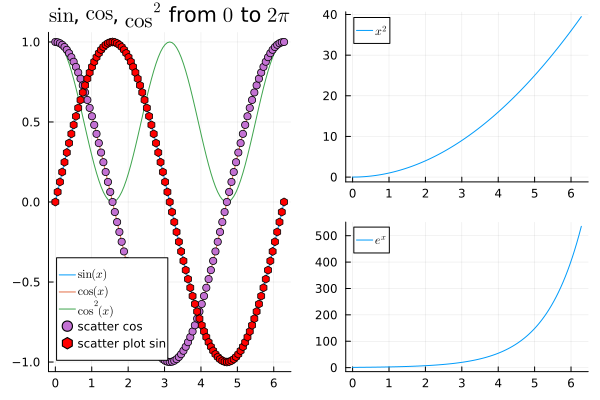

In [9]:
two_and_two = @layout [ a{0.5w} [ b ; c ] ] #a,b,c are arbitrary placeholders for a plot position
p2 = plot(x, (x->x^2).(x), label=L"x^2")
p3 = plot(x, (x->exp(x)).(x), label=L"e^x")
plot(p,p2,p3, layout=two_and_two)

## Multidimensional Plots

Plots also, of course, supports multidimensional data, for example via contour or surface plots:

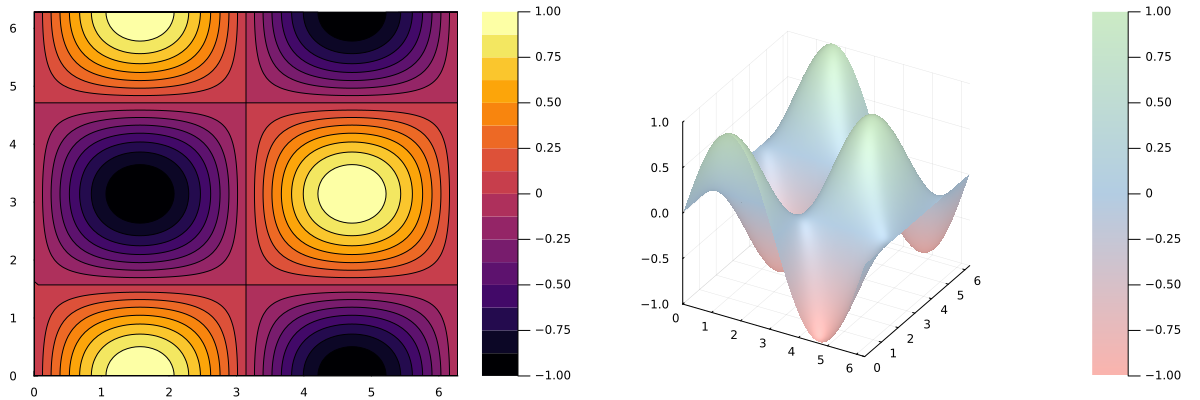

In [10]:
heights = ( (x,y) -> sin(x)*cos(y) ).(x',x)
cont_p = contour(x,x,heights, fill=true)  #or plot(x, x, heights, seriestype=:contour, fill=true)
threeD_p = surface(x,x,heights, c=:Pastel1_3)
plot(cont_p, threeD_p, layout=2, size=(1200,400))

## Plot Backends

Behind the scenes, Plots supports a number of different "plotting backends" that can produce different output formats and features. The default backend is called `GR`.
Many other plotting backends are available, including ones that drive gnuplot (`Gaston`) or matplotlib (`PythonPlot`). Generally, any extra backends need to be separately installed via Pkg.

For fun, lets demonstrate one of the more specialist backends: `UnicodePlots`, which outputs to purely text-based representations - useful in terminals without graphics support. To switch backends, you call a function with the same name as a backend.

Because this notebook is generated as a website by JupyterBook, which doesn't like UnicodePlots output, we've commented out the plot here - if you're reading along in the notebook, just uncomment it to try the plot. 
For those in JupyterBook's website version, we've pasted a copy of the output below the code block for you.

In [ ]:
unicodeplots()
# plot(x, [y y2], layout=(1,2), seriestype=[:line :scatter])

```
         +----------------------------------------+             +----------------------------------------+   
    1.06 | |      _---.                           | y1     1.06 | ⚬⚬⚬                                ⚬⚬⚬ | y2
         | |    ./     \.                         |             | | ⚬⚬                              ⚬⚬   |   
         | |   ,/       "\                        |             | |   ⚬⚬                          ⚬⚬     |   
         | |  .`          \                       |             | |    ⚬⚬                        ⚬⚬      |   
         | | .`           ".                      |             | |     ⚬⚬                      ⚬⚬       |   
         | |.`              \                     |             | |      ⚬⚬                    ⚬⚬        |   
         | |`               ".                    |             | |       ⚬                    ⚬         |   
         |-r------------------r-----------------v-|             |-r--------⚬------------------⚬----------|   
         | |                  \.               ./ |             | |         ⚬                ⚬           |   
         | |                   ,              ./  |             | |          ⚬              ⚬            |   
         | |                    \.           ./   |             | |          ⚬⚬            ⚬⚬            |   
         | |                     \.          ,    |             | |           ⚬⚬          ⚬⚬             |   
         | |                      \.       ,*     |             | |            ⚬⚬        ⚬⚬              |   
         | |                       \.     .`      |             | |              ⚬⚬    ⚬⚬                |   
   -1.06 | |                         \---"        |       -1.06 | |               ⚬⚬⚬⚬⚬⚬                 |   
         +----------------------------------------+             +----------------------------------------+   
          -0.188496                        6.47168               -0.188496                        6.47168
```




Advanced Features - StatsPlots
-----------------------------

Plots.jl has far more functionality than we've demonstrated in this quick tutorial: depending on the backend, it also supports animations and some interactivity, and of course can output to a number of file formats.

It also, via the additional `StatsPlots.jl` library, supports DataFrames and a wide variety of useful statistical plots (boxplots, violinplots, histograms...).
We'll demo this using one of the freely available datasets from the `RDatasets` package.

In [12]:
gr()
using StatsPlots, RDatasets

`StatsPlots` supports the `@df` macro, which will automatically unpack a provided DataFrame into a plot command, replacing symbols referencing its indices.

For example, to plot using the Barley Yields DataFrame, which has columns "Yield", "Year", "Variety" and "Site", we might do (here we need to specify "StatsPlots.groupedviolin" etc because we have a lot of loaded packages with overlapping namespaces):

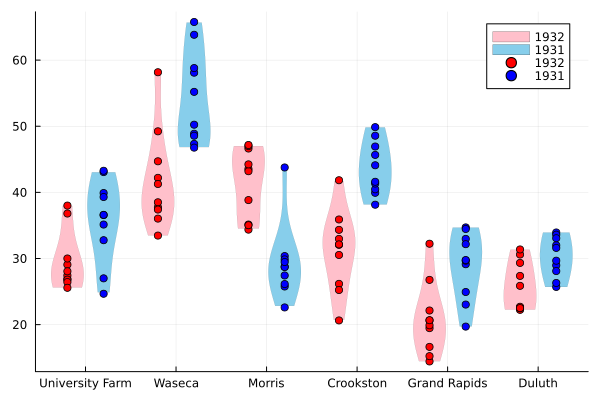

In [13]:
barley_yield = RDatasets.dataset("lattice", "barley")

#@df lets us use symbols :Site etc to map to the columns in the dataframe
@df barley_yield StatsPlots.groupedviolin(string.(:Site), :Yield, linewidth=0, group=:Year, c=[:pink :skyblue])
@df barley_yield StatsPlots.groupeddotplot!(string.(:Site), :Yield, mode= :none, group=:Year, c=[:red :blue])

We'll use this in a slightly more advanced way in the DataFrames tutorial...

Alternatives: Makie.jl
============================

Whilst we've introduced Plots.jl here, it's worth noting the other very popular Julia plotting library, `Makie` (or Maki-e, `Makie.jl`).

Makie is newer than Plots.jl, and is arguably a little harder to get started with. However, it has powerful functionality that isn't as easy to reproduce in Plots: an optional OpenGL backend for accelerated 3d plot rendering, and a "live" plot update system that hooks variables and naturally updates plots whenever the Observed values change. It also provides a better collection of statistical plots, and plotting features like cross-hatching, which can help to make more complex plots more readable.

Two of the authors of this tutorial prefer Makie in general for plotting; the other prefers Plots.jl, as least for simpler plots - in general, it really depends on which feature-set is most important to you.

To give you a glimpse of how Makie looks, here's the pair of contour/surface plots above, rendered with Makie's default Cairo-based backend (again, we need to specify "Makie." here because Plots also has a contour function in the notebook's namespace):

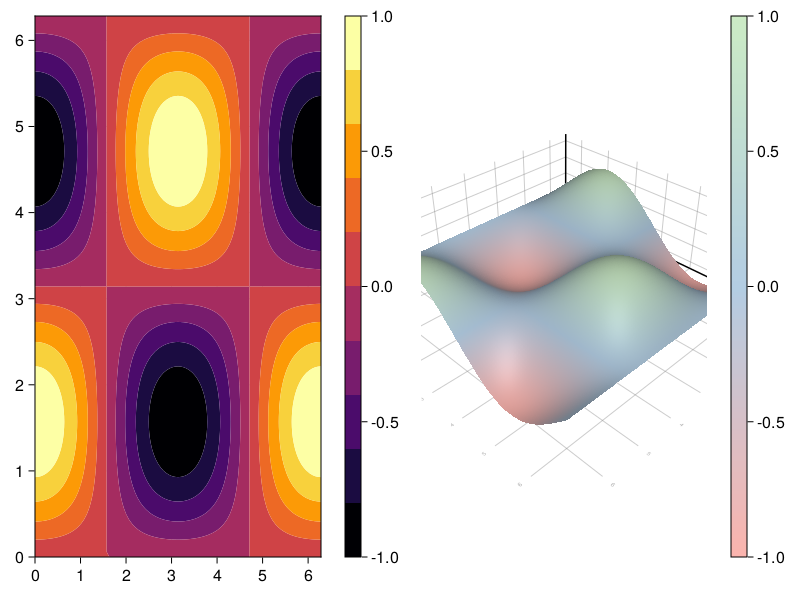

In [14]:
using CairoMakie
CairoMakie.activate!()

fig = Makie.Figure()
_, cont = Makie.contourf(fig[1,1],x,x,heights, colormap=:inferno) 
Makie.Colorbar(fig[1,2], cont)  #adding figure "subplots" happens automatically when we specify a new position - Makie sizes them appropriately
_, surf =Makie.surface(fig[1,3], x,x,heights, colormap=:Pastel1_3)
Makie.Colorbar(fig[1,4], surf)
fig

## Algebra of Graphics

Much as Plots.ji has StatsPlots as an extension package, `Makie` has `AlgebraofGraphics`, an extension which implements an R-style algebraic representation of plotting processes, with a bias towards statistical interpretation, and built-in support for DataFrames (and many other tabular data formats).

Again, here's the StatsPlot example above, rendered using Algebra of Graphics, which looks a little different:

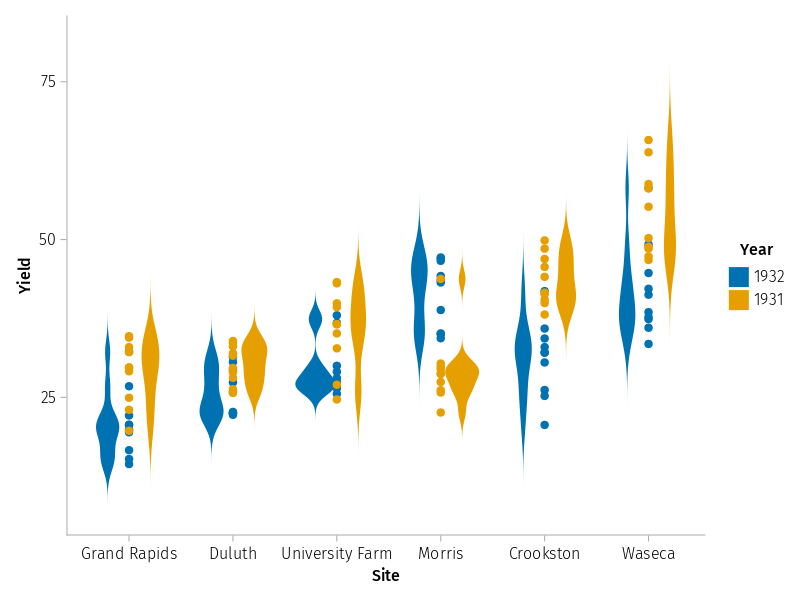

In [15]:
using AlgebraOfGraphics
set_aog_theme!()


# * is the composition operator for plot "pipeline", + is the composition operator to add additional elements within a layer
#               data layer                 mapping/selection layer                                analysis layer
scatter_viol =  data(barley_yield) * mapping(:Site, :Yield, color=:Year, dodge=:Year) * ( visual(Violin) + visual(Scatter) )
draw(scatter_viol)            